# Lets-Plot Cheatbook

## Contents

- [Preparation](#preparation)
  - [Imports](#preparation-imports)
  - [Data](#preparation-data)
- [Basics](#basics)
- [Features](#features)
  - [Interactive Maps](#features-interactive_maps)
  - [Customizable Tooltips](#features-customizable_tooltips)
  - [Formatting](#features-formatting)
  - [Sampling](#features-sampling)
  - [Images](#features-images)
  - [Correlation Plot](#features-correlation_plot)
  - [Joint Plot](#features-joint_plot)
  - [Residual Plot](#features-residual_plot)
  - [Waterfall Plot](#features-waterfall_plot)
- [Geoms](#geoms)
  - [Graphical Primitives](#geoms-graphical_primitives)
    - [Line Segments](#geoms-graphical_primitives-line_segments)
  - [One Variable](#geoms-one_variable)
    - [Continuous](#geoms-one_variable-continuous)
    - [Discrete](#geoms-one_variable-discrete)
  - [Two Variables](#geoms-two_variables)
    - [Both Continuous](#geoms-two_variables-both_continuous)
    - [One Discrete, One Continuous](#geoms-two_variables-one_discrete_one_continuous)
    - [Both Discrete](#geoms-two_variables-both_discrete)
    - [Continuous Bivariate Distribution](#geoms-two_variables-continuous_bivariate_distribution)
    - [Continuous Function](#geoms-two_variables-continuous_function)
    - [Visualizing Error](#geoms-two_variables-visualizing_error)
    - [Maps](#geoms-two_variables-maps)
  - [Three Variables](#geoms-three_variables)
- [Stats](#stats)
  - [Identity](#stats-identity)
  - [One Variable](#stats-one_variable)
    - [Continuous](#stats-one_variable-continuous)
    - [Discrete](#stats-one_variable-discrete)
  - [Two Variables](#stats-two_variables)
    - [Both Continuous](#stats-two_variables-both_continuous)
    - [One Discrete, One Continuous](#stats-two_variables-one_discrete_one_continuous)
    - [Both Discrete](#stats-two_variables-both_discrete)
    - [Continuous Bivariate Distribution](#stats-two_variables-continuous_bivariate_distribution)
  - [Three Variables](#stats-three_variables)
- [Scales](#scales)
  - [General Purpose Scales](#scales-general_purpose_scales)
  - [X & Y Location Scales](#scales-x_and_y_location_scales)
  - [Color & Fill Scales](#scales-color_and_fill_scales)
    - [Continuous](#scales-color_and_fill_scales-continuous)
    - [Discrete](#scales-color_and_fill_scales-discrete)
  - [Size & Shape Scales](#scales-size_and_shape_scales)
- [Coordinate Systems](#coordinate_systems)
- [Position Adjustments](#position_adjustments)
- [Themes](#themes)
- [Flavors](#flavors)
- [Faceting](#faceting)
- [Labels & Legends](#labels_and_legends)
- [Zooming](#zooming)

## Preparation <a class="anchor" id="preparation"></a>

### Imports <a class="anchor" id="preparation-imports"></a>

In [1]:
from io import BytesIO
import requests

import numpy as np
import pandas as pd
from PIL import Image
from scipy.stats import multivariate_normal

from lets_plot import *
from lets_plot.bistro import *
from lets_plot.geo_data import *

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


In [2]:
LetsPlot.setup_html()

### Data <a class="anchor" id="preparation-data"></a>

In [3]:
mpg_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
mpg_df.head(3)

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [4]:
class_df = mpg_df.groupby('class').hwy.agg(['min', 'median', 'max', 'count']).reset_index()
class_df.head(3)

,class,min,median,max,count
0,2seater,23,25.0,26,5
1,compact,23,27.0,44,47
2,midsize,23,27.0,32,41


In [5]:
fl_df = mpg_df.groupby(['cty', 'hwy']).fl.agg(pd.Series.mode).to_frame('fl').reset_index()
fl_df.head(3)

,cty,hwy,fl
0,9,12,e
1,11,14,"[e, p]"
2,11,15,r


In [6]:
economics_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/economics.csv', parse_dates=['date'])
economics_df.head(3)

,Unnamed: 0,date,pce,pop,psavert,uempmed,unemploy
0,1,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,2,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,3,1967-09-01,515.6,199113.0,11.9,4.6,2958


In [7]:
midwest_df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/midwest.csv')
midwest_df.head()

,Unnamed: 0,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,1,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,2,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,3,563,BOND,IL,0.022,14991,681.409091,14477,429,35,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,4,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,5,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [8]:
pop_df = midwest_df.groupby('state').poptotal.sum().to_frame('population').reset_index()
pop_df.head(3)

,state,population
0,IL,11430602
1,IN,5544159
2,MI,9295297


In [9]:
states_df = geocode('state', pop_df.state, scope='US').get_boundaries(9)
states_df.head(3)

,state,found name,geometry
0,IL,Illinois,"MULTIPOLYGON (((-89.13301 36.982, -89.16777 36..."
1,IN,Indiana,"MULTIPOLYGON (((-84.81993 39.10544, -84.83405 ..."
2,MI,Michigan,"MULTIPOLYGON (((-90.41862 46.56636, -90.00014 ..."


In [10]:
def generate_random_data(size=50, mean=[0, 0], cov=[[1, .5], [.5, 1]], seed=42):
    np.random.seed(seed)
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    Z = multivariate_normal(mean, cov).pdf(np.dstack((X, Y)))
    return pd.DataFrame({'x': X.flatten(), 'y': Y.flatten(), 'z': Z.flatten()})

random_df = generate_random_data()
random_df.head(3)

,x,y,z
0,-1.000000,-1.0,0.094354
1,-0.959184,-1.0,0.096849
2,-0.918367,-1.0,0.099189


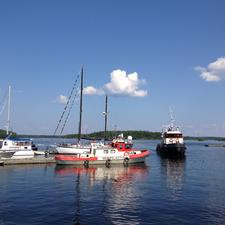

In [11]:
response = requests.get('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/source/examples/cookbook/images/fisher_boat.png')
img = Image.open(BytesIO(response.content))
img

## Basics <a class="anchor" id="basics"></a>

In [12]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(color='cyl')) + \
    geom_smooth(method='lm') + \
    scale_color_brewer(type='div', palette='Spectral') + \
    theme_classic() + \
    ggtitle("Simple linear smoothing")

## Features <a class="anchor" id="features"></a>

### Interactive Maps <a class="anchor" id="features-interactive_maps"></a>

In [13]:
ggplot() + \
    geom_livemap() + \
    geom_map(aes(color='population', fill='population'), \
             data=pop_df, map=states_df, map_join='state', size=1, alpha=.3) + \
    scale_color_gradient(low='#1a9641', high='#d7191c') + \
    scale_fill_gradient(low='#1a9641', high='#d7191c')

### Customizable Tooltips <a class="anchor" id="features-customizable_tooltips"></a>

In [14]:
ggplot(mpg_df, aes(x='fl', fill=as_discrete('year'))) + \
    geom_bar(tooltips=layer_tooltips().line('fl|^x')
                                      .line('@|@year')
                                      .line('count|@..count..'))

### Formatting <a class="anchor" id="features-formatting"></a>

In [15]:
ggplot(economics_df, aes('date', 'unemploy')) + \
    geom_area(color='#253494', fill='#41b6c4') + \
    scale_x_datetime(format='%e %b %Y')

### Sampling <a class="anchor" id="features-sampling"></a>

In [16]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(color=as_discrete('cyl')), sampling=sampling_group_random(2, seed=42))

### Images <a class="anchor" id="features-images"></a>


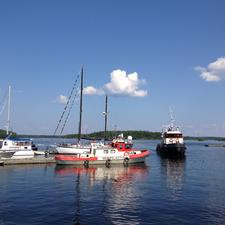

In [17]:
ggplot() + \
    geom_imshow(np.asarray(img)) + \
    theme_void()

### Correlation Plot <a class="anchor" id="features-correlation_plot"></a>

In [18]:
corr_plot(data=mpg_df.select_dtypes(include=np.number), threshold=.5)\
    .points().labels()\
    .palette_gradient(low='#d7191c', mid='#ffffbf', high='#1a9641')\
    .build() + \
    ggsize(400, 400)

### Joint Plot <a class="anchor" id="features-joint_plot"></a>

In [19]:
joint_plot(data=mpg_df, x='cty', y='hwy')

### Residual Plot <a class="anchor" id="features-residual_plot"></a>

In [20]:
residual_plot(data=mpg_df, x='cty', y='hwy', size=5, alpha=.5, color_by='drv', marginal="dens:tr")

### Waterfall Plot <a class="anchor" id="features-waterfall_plot"></a>

In [21]:
waterfall_plot(class_df, "class", "count")

## Geoms <a class="anchor" id="geoms"></a>

### Graphical Primitives <a class="anchor" id="geoms-graphical_primitives"></a>

In [22]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_path()

In [23]:
ggplot() + \
    geom_polygon(data=states_df)

In [24]:
ggplot() + \
    geom_rect(xmin=0, xmax=1, ymin=0, ymax=1)

In [25]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_ribbon(aes(ymin=economics_df.unemploy - 900, ymax=economics_df.unemploy + 900))

In [26]:
ggplot() + \
    geom_band(xmin=-1, xmax=1)

#### Line Segments <a class="anchor" id="geoms-graphical_primitives-line_segments"></a>

In [27]:
ggplot() + \
    geom_abline(slope=.5)

In [28]:
ggplot() + \
    geom_hline(yintercept=0)

In [29]:
ggplot() + \
    geom_vline(xintercept=0)

In [30]:
ggplot() + \
    geom_segment(x=0, y=0, xend=1, yend=1, arrow=arrow())

In [31]:
ggplot() + \
    geom_curve(x=0, y=0, xend=1, yend=1, curvature=0.3, arrow=arrow())

In [32]:
ggplot() + \
    geom_spoke(x=0, y=0, angle=0.64, radius=5)

### One Variable <a class="anchor" id="geoms-one_variable"></a>

#### Continuous <a class="anchor" id="geoms-one_variable-continuous"></a>

In [33]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_area(stat='bin')

In [34]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_density()

In [35]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_freqpoly()

In [36]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram()

In [37]:
ggplot(mpg_df, aes(x='hwy')) + \
    geom_dotplot(stackratio=.5)

In [38]:
ggplot(mpg_df, aes(sample='hwy')) + \
    geom_qq() + \
    geom_qq_line()

#### Discrete <a class="anchor" id="geoms-one_variable-discrete"></a>

In [39]:
ggplot(mpg_df, aes(x='fl')) + \
    geom_bar()

In [40]:
ggplot(mpg_df) + \
    geom_pie(aes(fill='fl'))

In [41]:
ggplot() + \
    geom_function(aes(x='hwy'), data=mpg_df, fun=lambda t: t**.5)

### Two Variables <a class="anchor" id="geoms-two_variables"></a>

#### Both Continuous <a class="anchor" id="geoms-two_variables-both_continuous"></a>

In [42]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()

In [43]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_smooth()

In [44]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_qq2() + \
    geom_qq2_line()

In [45]:
ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_text(aes(label='fl'))

In [46]:
ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_label(aes(label='fl'))

#### One Discrete, One Continuous <a class="anchor" id="geoms-two_variables-one_discrete_one_continuous"></a>

In [47]:
ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_boxplot()

In [48]:
ggplot(mpg_df, aes('hwy', 'class')) + \
    geom_area_ridges()

In [49]:
ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_violin()

In [50]:
ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_ydotplot(stackratio=.5)

In [51]:
ggplot(class_df, aes('class', 'count')) + \
    geom_bar(stat='identity')

#### Both Discrete <a class="anchor" id="geoms-two_variables-both_discrete"></a>

In [52]:
ggplot(mpg_df, aes('fl', 'drv')) + \
    geom_count()

In [53]:
ggplot(mpg_df, aes('fl', 'drv')) + \
    geom_jitter(seed=42)

#### Continuous Bivariate Distribution <a class="anchor" id="geoms-two_variables-continuous_bivariate_distribution"></a>

In [54]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_bin2d()

In [55]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_density2d(aes(color='..group..'))

In [56]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_density2df(aes(fill='..group..'))

#### Continuous Function <a class="anchor" id="geoms-two_variables-continuous_function"></a>

In [57]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_area()

In [58]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_line()

In [59]:
ggplot(economics_df, aes('date', 'unemploy')) + scale_x_datetime() + \
    geom_step()

#### Visualizing Error <a class="anchor" id="geoms-two_variables-visualizing_error"></a>

In [60]:
ggplot(class_df, aes(x='class')) + \
    geom_crossbar(aes(ymin='min', y='median', ymax='max'))

In [61]:
ggplot(class_df, aes(x='class')) + \
    geom_errorbar(aes(ymin='min', ymax='max'))

In [62]:
ggplot(class_df, aes(x='class')) + \
    geom_linerange(aes(ymin='min', ymax='max'))

In [63]:
ggplot(class_df, aes(x='class')) + \
    geom_pointrange(aes(ymin='min', y='median', ymax='max'))

#### Maps <a class="anchor" id="geoms-two_variables-maps"></a>

In [64]:
ggplot() + \
    geom_map(data=states_df)

### Three Variables <a class="anchor" id="geoms-three_variables"></a>

In [65]:
ggplot(random_df, aes('x', 'y')) + \
    geom_contour(aes(z='z'))

In [66]:
ggplot(random_df, aes('x', 'y')) + \
    geom_contourf(aes(z='z'))

In [67]:
ggplot(random_df, aes('x', 'y')) + \
    geom_raster(aes(fill='z'))

In [68]:
ggplot(random_df, aes('x', 'y')) + \
    geom_tile(aes(fill='z'))

## Stats <a class="anchor" id="stats"></a>

### Identity <a class="anchor" id="stats-identity"></a>

In [69]:
p_bunch_1 = ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_bar() + \
    ggtitle("Bar geom, default stat")
p_bunch_2 = ggplot(class_df, aes('class', 'count')) + \
    geom_bar(stat='identity') + \
    ggtitle("Bar geom, identity stat")

gggrid([p_bunch_1, p_bunch_2])

### One Variable <a class="anchor" id="stats-one_variable"></a>

#### Continuous <a class="anchor" id="stats-one_variable-continuous"></a>

In [70]:
ggplot(mpg_df, aes(x='hwy')) + \
    stat_ecdf()

#### Discrete <a class="anchor" id="stats-one_variable-discrete"></a>

In [71]:
p_bunch_1 = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar() + \
    ggtitle("Bar geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes(x='fl')) + \
    geom_lollipop(aes(y='..count..'), stat='count') + \
    ggtitle("Lollipop geom, count stat")

gggrid([p_bunch_1, p_bunch_2])

In [72]:
p_bunch_1 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram() + \
    ggtitle("Histogram geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_step(aes(y='..count..'), stat='bin') + \
    ggtitle("Step geom, bin stat")

gggrid([p_bunch_1, p_bunch_2])

In [73]:
p_bunch_1 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_density() + \
    ggtitle("Density geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_point(stat='density') + \
    ggtitle("Point geom, density stat")

gggrid([p_bunch_1, p_bunch_2])

### Two Variables <a class="anchor" id="stats-two_variables"></a>

#### Both Continuous <a class="anchor" id="stats-two_variables-both_continuous"></a>

In [74]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    stat_summary_bin()

In [75]:
p_bunch_1 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_smooth() + \
    ggtitle("Smooth geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_crossbar(aes(y='hwy', ymin='..ymin..', ymax='..ymax..'), stat='smooth') + \
    ggtitle("Crossbar geom, smooth stat")

gggrid([p_bunch_1, p_bunch_2])

#### One Discrete, One Continuous <a class="anchor" id="stats-two_variables-one_discrete_one_continuous"></a>

In [76]:
ggplot(mpg_df, aes('class', 'hwy')) + \
    stat_summary()

In [77]:
p_bunch_1 = ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_boxplot() + \
    ylim(10, 50) + \
    ggtitle("Boxplot geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_linerange(aes(ymin='..ymin..', ymax='..ymax..'), stat='boxplot', color='black') + \
    geom_errorbar(aes(ymin='..lower..', ymax='..upper..'), stat='boxplot', width=.9) + \
    ylim(10, 50) + \
    ggtitle("Linerange and errorbar geoms, boxplot stat")

gggrid([p_bunch_1, p_bunch_2])

#### Both Discrete <a class="anchor" id="stats-two_variables-both_discrete"></a>

In [78]:
ggplot(mpg_df, aes('fl', 'drv')) + \
    stat_sum()

#### Continuous Bivariate Distribution <a class="anchor" id="stats-two_variables-continuous_bivariate_distribution"></a>

In [79]:
p_bunch_1 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_bin2d() + \
    ggtitle("Bin2d geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(color='..count..'), stat='bin2d') + \
    ggtitle("Point geom, bin2d stat")

gggrid([p_bunch_1, p_bunch_2])

In [80]:
p_bunch_1 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_density2d(aes(color='..group..')) + \
    ggtitle("Density2d geom, default stat")
p_bunch_2 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_tile(aes(color='..group..'), stat='density2d', size=.5) + \
    ggtitle("Tile geom, density2d stat")

gggrid([p_bunch_1, p_bunch_2])

### Three Variables <a class="anchor" id="stats-three_variables"></a>

In [81]:
p_bunch_1 = ggplot(random_df, aes('x', 'y')) + \
    geom_contour(aes(z='z')) + \
    ggtitle("Contour geom, default stat")
p_bunch_2 = ggplot(random_df, aes('x', 'y')) + \
    geom_path(aes(z='z'), stat='contour') + \
    ggtitle("Path geom, contour stat")

gggrid([p_bunch_1, p_bunch_2])

## Scales <a class="anchor" id="scales"></a>

### General Purpose Scales <a class="anchor" id="scales-general_purpose_scales"></a>

In [82]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='fl'))
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_continuous() + \
    ggtitle("Bar geom, continuous fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [83]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_discrete(guide='none') + \
    ggtitle("Histogram geom, discrete fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [84]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(alpha='fl'), color='#0c2c84', fill='#0c2c84')
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default alpha scale")
p_bunch_2 = p_common + \
    scale_alpha_manual(values=[.4, .1, .8, .85, .9]) + \
    ggtitle("Bar geom, manual alpha scale")

gggrid([p_bunch_1, p_bunch_2])

In [85]:
p_common = ggplot(economics_df, aes('date', 'unemploy')) + \
    scale_x_datetime() + \
    geom_point(aes(size='psavert'), shape=21, alpha=.3, show_legend=False)
p_bunch_1 = p_common + \
    ggtitle("Point geom, default size scale")
p_bunch_2 = p_common + \
    scale_size_identity() + \
    ggtitle("Point geom, identity size scale")

gggrid([p_bunch_1, p_bunch_2])

### X & Y Location Scales <a class="anchor" id="scales-x_and_y_location_scales"></a>

In [86]:
breaks = [economics_df.date.min(), economics_df.date.median(), economics_df.date.max()]
labels = [str(date).split('-')[0] for date in breaks]
p_common = ggplot(economics_df, aes('date', 'pce')) + geom_line()
p_bunch_1 = p_common + \
    ggtitle("Line geom, default x scale")
p_bunch_2 = p_common + \
    scale_x_datetime() + \
    ggtitle("Line geom, datetime x scale")
p_bunch_3 = p_common + \
    scale_x_time(breaks=breaks, labels=labels) + \
    ggtitle("Line geom, time x scale")

gggrid([p_bunch_1, p_bunch_2, p_bunch_3])

In [87]:
p_common = ggplot(midwest_df, aes('state', 'poptotal')) + \
    geom_jitter(aes(color='state'), seed=42) + \
    coord_flip()
p_bunch_1 = p_common + \
    ggtitle("Jitter geom, default y scale")
p_bunch_2 = p_common + \
    scale_y_log10() + \
    ggtitle("Jitter geom, log10 y scale")

gggrid([p_bunch_1, p_bunch_2])

In [88]:
p_common = ggplot(economics_df, aes('date', 'pce')) + \
    geom_line()
p_bunch_1 = p_common + \
    ggtitle("Line geom, default x scale")
p_bunch_2 = p_common + \
    scale_x_reverse() + \
    ggtitle("Line geom, reversed x scale")

gggrid([p_bunch_1, p_bunch_2])

### Color & Fill Scales <a class="anchor" id="scales-color_and_fill_scales"></a>

#### Continuous <a class="anchor" id="scales-color_and_fill_scales-continuous"></a>

In [89]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_grey() + \
    ggtitle("Histogram geom, grey fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [90]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_gradient(low='#006d2c', high='#edf8e9') + \
    ggtitle("Histogram geom, gradient fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [91]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_brewer(type='seq', palette='GnBu', direction=-1) + \
    ggtitle("Histogram geom, brewer fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [92]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_viridis(option='inferno') + \
    ggtitle("Histogram geom, viridis fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [93]:
p_common = ggplot(mpg_df, aes(x='hwy')) + \
    geom_histogram(aes(fill='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_hue(l=80, c=150) + \
    ggtitle("Histogram geom, hue fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [94]:
p_common = ggplot(random_df, aes('x', 'y')) + \
    geom_histogram(aes(fill='x'), bins=7)
p_bunch_1 = p_common + \
    ggtitle("Histogram geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_gradient2(low='#4575b4', mid='#ffffbf', high='#d73027') + \
    ggtitle("Histogram geom, gradient2 fill scale")

gggrid([p_bunch_1, p_bunch_2])

#### Discrete <a class="anchor" id="scales-color_and_fill_scales-discrete"></a>

In [95]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='fl'))
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_brewer(type='qual', palette='Set1') + \
    ggtitle("Bar geom, brewer fill scale")

gggrid([p_bunch_1, p_bunch_2])

In [96]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='fl'))
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default fill scale")
p_bunch_2 = p_common + \
    scale_fill_manual(values=['#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6']) + \
    ggtitle("Bar geom, manual fill scale")

gggrid([p_bunch_1, p_bunch_2])

### Size & Shape Scales <a class="anchor" id="scales-size_and_shape_scales"></a>

In [97]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(size='cyl'), shape=21, alpha=.2)
p_bunch_1 = p_common + \
    ggtitle("Point geom, default size scale")
p_bunch_2 = p_common + \
    scale_size_area() + \
    ggtitle("Point geom, area size scale")

gggrid([p_bunch_1, p_bunch_2])

In [98]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(size='cyl'), shape=21, alpha=.2)
p_bunch_1 = p_common + \
    ggtitle("Point geom, default size scale")
p_bunch_2 = p_common + \
    scale_size(range=[3, 6]) + \
    ggtitle("Point geom, size scale in range 3..6")

gggrid([p_bunch_1, p_bunch_2])

In [99]:
p_common = ggplot(mpg_df[mpg_df["fl"] == "p"], aes('hwy', 'cty')) + \
    geom_lollipop(aes(linewidth='cyl'), slope=.7, intercept=.8, dir='s') + \
    coord_fixed()
p_bunch_1 = p_common + \
    ggtitle("Lollipop geom, default linewidth scale")
p_bunch_2 = p_common + \
    scale_linewidth(range=[.5, 2]) + \
    ggtitle("Lollipop geom, scaled linewidth")

gggrid([p_bunch_1, p_bunch_2])

In [100]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(stroke='cyl'), shape=1, alpha=.2)
p_bunch_1 = p_common + \
    ggtitle("Point geom, default stroke scale")
p_bunch_2 = p_common + \
    scale_stroke(range=[.5, 2]) + \
    ggtitle("Point geom, scaled stroke")

gggrid([p_bunch_1, p_bunch_2])

In [101]:
p_common = ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_point(aes(shape='fl'))
p_bunch_1 = p_common + \
    ggtitle("Point geom, default shape scale")
p_bunch_2 = p_common + \
    scale_shape(solid=False) + \
    ggtitle("Point geom, shape scale with solid=False")

gggrid([p_bunch_1, p_bunch_2])

In [102]:
p_common = ggplot(fl_df, aes('cty', 'hwy')) + \
    geom_point(aes(shape='fl'))
p_bunch_1 = p_common + \
    ggtitle("Point geom, default shape scale")
p_bunch_2 = p_common + \
    scale_shape_manual(values=[0, 12, 1, 10, 3, 13, 2, 4]) + \
    ggtitle("Point geom, manual shape scale")

gggrid([p_bunch_1, p_bunch_2])

## Coordinate Systems <a class="anchor" id="coordinate_systems"></a>

In [103]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar()
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_cartesian(ylim=[0, 250]) + \
    ggtitle("Bar geom, cartesian coordinate system")

gggrid([p_bunch_1, p_bunch_2])

In [104]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch_1 = p_common + \
    ggtitle("Point geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_polar() + \
    ggtitle("Point geom, polar coordinate system")

gggrid([p_bunch_1, p_bunch_2])

In [105]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch_1 = p_common + \
    ggtitle("Point geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_fixed() + \
    ggtitle("Point geom, fixed coordinate system")

gggrid([p_bunch_1, p_bunch_2])

In [106]:
p_common = ggplot() + \
    geom_polygon(data=states_df)
p_bunch_1 = p_common + \
    ggtitle("Polygon geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_map() + \
    ggtitle("Polygon geom, map coordinate system")

gggrid([p_bunch_1, p_bunch_2])

In [107]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar()
p_bunch_1 = p_common + \
    ggtitle("Bar geom, default coordinate system")
p_bunch_2 = p_common + \
    coord_flip() + \
    ggtitle("Bar geom, flipped coordinates")

gggrid([p_bunch_1, p_bunch_2])

## Position Adjustments <a class="anchor" id="position_adjustments"></a>

In [108]:
p_bunch_1 = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='drv')) + \
    ggtitle("Bar geom, default position")
p_bunch_2 = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='drv'), position='dodge') + \
    ggtitle("Bar geom, dodge position")

gggrid([p_bunch_1, p_bunch_2])

In [109]:
p_bunch_1 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_density(aes(fill='drv'), color="black") + \
    ggtitle("Density geom, default position")
p_bunch_2 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_density(aes(fill='drv'), color="black", position='stack') + \
    ggtitle("Density geom, stack position")
p_bunch_3 = ggplot(mpg_df, aes(x='hwy')) + \
    geom_density(aes(fill='drv'), color="black", position='fill') + \
    ggtitle("Density geom, fill position")

gggrid([p_bunch_1, p_bunch_2, p_bunch_3])

In [110]:
p_bunch_1 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    ggtitle("Point geom, default position")
p_bunch_2 = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(position=position_jitter(seed=42)) + \
    ggtitle("Point geom, jitter position")

gggrid([p_bunch_1, p_bunch_2])

In [111]:
p_common = ggplot(mpg_df, aes('cyl', 'hwy', fill='drv'))
p_bunch_1 = p_common + \
    geom_boxplot() + \
    geom_point(color='black', shape=21) + \
    ggtitle("Point geom, default position")
p_bunch_2 = p_common + \
    geom_boxplot() + \
    geom_point(position=position_jitterdodge(seed=42), \
               color='black', shape=21) + \
    ggtitle("Point geom, jitterdodge position")

gggrid([p_bunch_1, p_bunch_2])

In [112]:
p_common = ggplot(mpg_df, aes('class', 'hwy')) + \
    geom_bar()
p_bunch_1 = p_common + \
    geom_text(aes(label='..count..'), stat='count') + \
    ggtitle("Text geom, default position")
p_bunch_2 = p_common + \
    geom_text(aes(label='..count..'), stat='count', color='white', \
              position=position_nudge(y=-2.5)) + \
    ggtitle("Text geom, nudge position")

gggrid([p_bunch_1, p_bunch_2])

## Themes <a class="anchor" id="themes"></a>

In [113]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch = []
p_bunch.append(p_common + ggtitle("Default theme"))
p_bunch.append(p_common + theme_none() + ggtitle("Empty theme"))
p_bunch.append(p_common + theme_void() + ggtitle("Void theme"))
p_bunch.append(p_common + theme_minimal() + ggtitle("Minimalistic theme"))
p_bunch.append(p_common + theme_classic() + ggtitle("Classic theme"))
p_bunch.append(p_common + theme_grey() + ggtitle("Grey theme"))
p_bunch.append(p_common + theme_light() + ggtitle("Light theme"))
p_bunch.append(p_common + theme_bw() + ggtitle("Dark-on-light theme"))

gggrid(p_bunch, ncol=2)

In [114]:
background_color_light = '#ffffe5'
main_color_dark = '#00441b'
main_color_normal = '#238b45'
main_color_light = '#f7fcf5'

custom_theme = theme(
    line=element_line(color=main_color_normal, size=2),
    rect=element_rect(color=main_color_normal, fill=main_color_light, size=2),
    text=element_text(color=main_color_dark, family="Courier", face="bold"),
    geom=element_geom(pen=main_color_normal),
    axis_ontop=True,
    axis_ticks=element_line(color=main_color_normal, size=1),
    axis_ticks_length=7,
    legend_background=element_rect(size=1),
    legend_position='bottom',
    panel_grid_major=element_line(color=main_color_normal, size=.5),
    panel_grid_minor='blank',
    plot_background=element_rect(fill=background_color_light, size=1),
    axis_tooltip=element_rect(color=main_color_dark)
)

ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    theme_none() + \
    custom_theme + \
    ggtitle("Custom theme")

## Flavors <a class="anchor" id="flavors"></a>

In [115]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    theme_grey()
p_bunch = []
p_bunch.append(p_common + ggtitle("Without flavor"))
p_bunch.append(p_common + flavor_darcula() + ggtitle("flavor_darcula()"))
p_bunch.append(p_common + flavor_solarized_light() + ggtitle("flavor_solarized_light()"))
p_bunch.append(p_common + flavor_solarized_dark() + ggtitle("flavor_solarized_dark()"))
p_bunch.append(p_common + flavor_high_contrast_light() + ggtitle("flavor_high_contrast_light()"))
p_bunch.append(p_common + flavor_high_contrast_dark() + ggtitle("flavor_high_contrast_dark()"))

gggrid(p_bunch, ncol=2)

## Faceting <a class="anchor" id="faceting"></a>

In [116]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    facet_grid(x='fl', y='year')

In [117]:
ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point() + \
    facet_wrap(facets='fl', ncol=3)

## Labels & Legends <a class="anchor" id="labels_and_legends"></a>

In [118]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    labs(x='City miles per gallon', y='Highway miles per gallon') + \
    ggtitle("Use labs()")

gggrid([p_bunch_1, p_bunch_2])

In [119]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point()
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    xlab('City miles per gallon') + \
    ylab('Highway miles per gallon') + \
    ggtitle("Use xlab() and ylab()")

gggrid([p_bunch_1, p_bunch_2])

In [120]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='fl'))
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    theme(legend_position='top') + \
    ggtitle("Use legend_position='top'")

gggrid([p_bunch_1, p_bunch_2])

In [121]:
p_common = ggplot(mpg_df, aes('cty', 'hwy')) + \
    geom_point(aes(color='hwy'))
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    scale_color_gradient(
        guide=guide_colorbar(nbin=40, barwidth=10, barheight=200)
    ) + \
    ggtitle("Use guide_colorbar()")

gggrid([p_bunch_1, p_bunch_2])

In [122]:
p_common = ggplot(mpg_df, aes(x='fl')) + \
    geom_bar(aes(fill='manufacturer')) + \
    theme(legend_position='bottom')
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    scale_fill_discrete(guide=guide_legend(nrow=3)) + \
    ggtitle("Use guide_legend()")

gggrid([p_bunch_1, p_bunch_2])

## Zooming <a class="anchor" id="zooming"></a>

In [123]:
p_common = ggplot() + \
    geom_map(data=states_df) + \
    theme_classic()
p_bunch_1 = p_common + \
    ggtitle("Default plot")
p_bunch_2 = p_common + \
    scale_x_continuous(limits=[-92, -82]) + \
    ylim(36, 43) + \
    ggtitle("Zoom with clipping")
p_bunch_3 = p_common + \
    coord_map(xlim=[-92, -82], ylim=[36, 43]) + \
    ggtitle("Zoom without clipping")

gggrid([p_bunch_1, p_bunch_2, p_bunch_3])